**Import libaries**

In [1]:
#for import the data
import pandas as pd
import numpy as np

# for the visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for the text pre-processing (text cleaning)
import nltk
nltk.download('punkt')
import re #regular expression
import string
from nltk.tokenize import word_tokenize # word tokenization
from nltk.stem import PorterStemmer # word stemming

#for feature extraction ( vectorazation)
from sklearn.feature_extraction.text import CountVectorizer

#for split the data into train and test
from sklearn.model_selection import train_test_split

#for the model training
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#for the model evaluation
from sklearn.metrics import confusion_matrix,classification_report

[nltk_data] Downloading package punkt to C:\Users\Mohamed
[nltk_data]     Ilham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

**Import Data**

In [3]:
"""
chardet is a library  detect the most probable character encoding in a text file
"""
import chardet
with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
data = pd.read_csv('spam.csv', encoding=result['encoding'])

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [5]:
#take the text and the label columns & rename each column
data=data[['v1','v2']]
data = data.rename(columns={'v1':'label','v2':'text'})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [6]:
#Drop Duplicated Rows
data = data.drop_duplicates()

**Exploratory Data Analysis (EDA)**

In [7]:
data.shape

(5169, 2)

In [8]:
data.isna().sum()
#we don't have missing data

label    0
text     0
dtype: int64

In [9]:
s=data.label.value_counts()
print(s)
print('ham :',round(s[0]/len(data)*100,2),'%')
print('spam :',round(s[1]/len(data)*100,2),'%')

label
ham     4516
spam     653
Name: count, dtype: int64
ham : 87.37 %
spam : 12.63 %


In [10]:
# So we have 4516 ham and 653 spam
# 87.95% of the data are ham emails and just 12.36% is spam
# so the problem is present here is that the model will learn with ham much more than spam

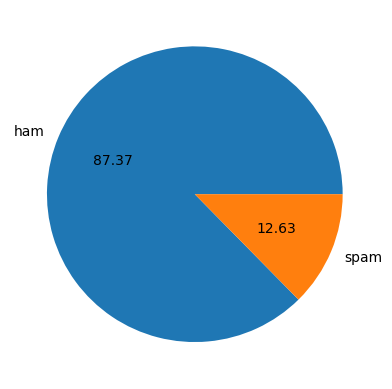

In [11]:
plt.pie(data['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [12]:
# defne new column named 'email_length' that contain the length of each email in the dataset
data["email_length"]=data["text"].apply(len)

In [13]:
print('the max length email is:',data['email_length'].max())
print('the min length email is:',data['email_length'].min())
print('the avg length email is:',data['email_length'].mean())

the max length email is: 910
the min length email is: 2
the avg length email is: 78.97794544399304


<Axes: ylabel='Frequency'>

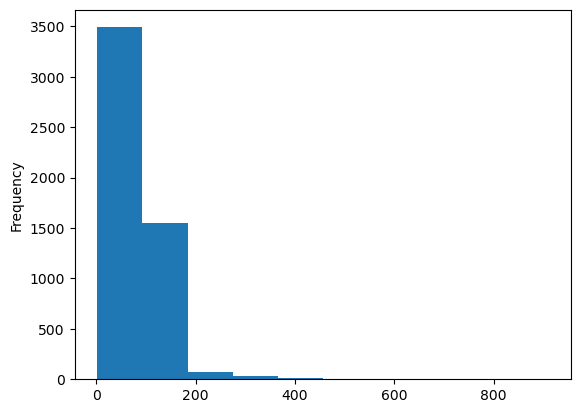

In [14]:
#display the distribution of email's length
data['email_length'].plot.hist()

In [15]:
# delete all emails that its length not in [4:250]
data = data[data.email_length<251]
data = data[data.email_length>3]

<Axes: ylabel='Frequency'>

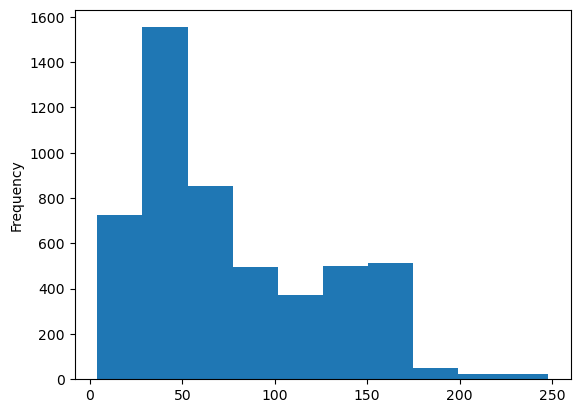

In [16]:
data['email_length'].plot.hist()

In [17]:
#shape of new data
data.shape

(5106, 3)

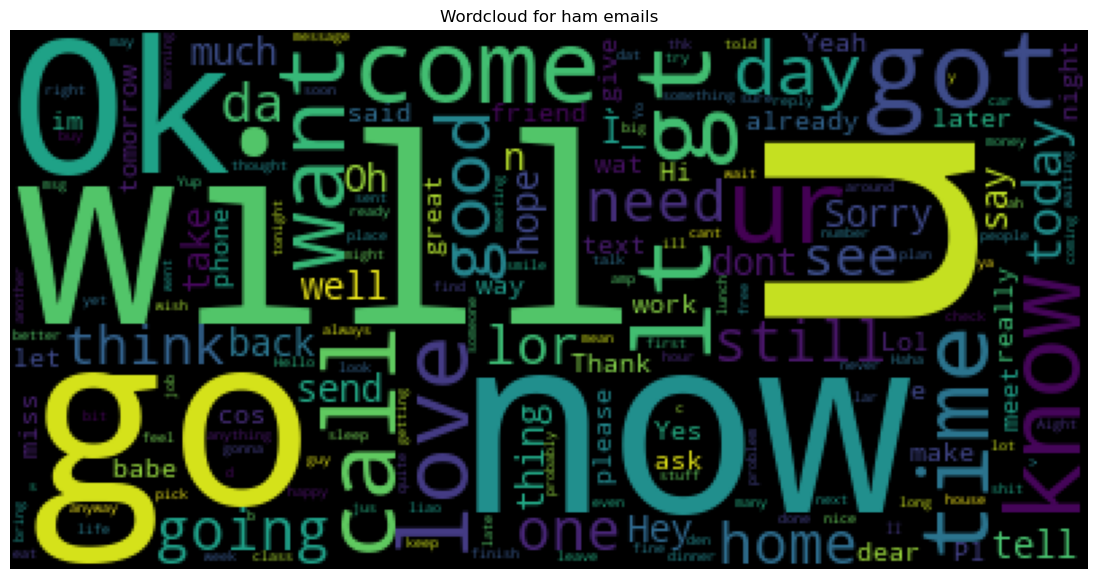

In [18]:
from wordcloud import WordCloud,STOPWORDS
text = list(data[data["label"] == 'ham'].text.values)
wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))
plt.figure(figsize = (15, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Wordcloud for ham emails')
plt.show()

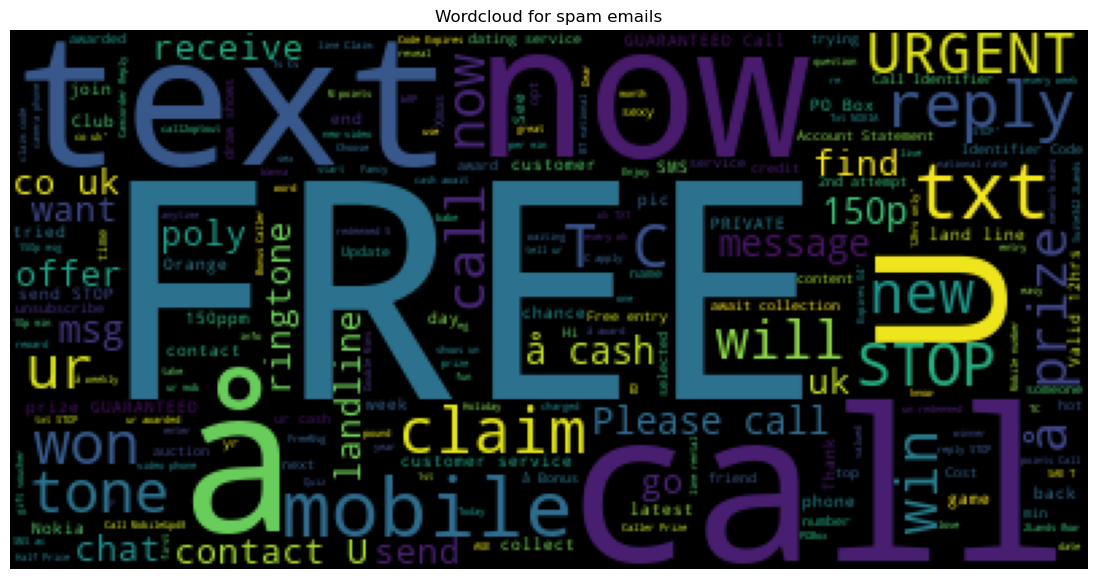

In [19]:
from wordcloud import WordCloud,STOPWORDS
text = list(data[data["label"] == 'spam'].text.values)
wordcloud = WordCloud(stopwords=STOPWORDS).generate(str(text))
plt.figure(figsize = (15, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Wordcloud for spam emails')
plt.show()

**Data Pre-Processing**

**Text Cleaning**



In [20]:
#Clean Text
def clean_text(data):
  # convert catacter to lowercase
  data['clean_text']=data['text'].str.lower()
  #remove URLS
  data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r"http\S+", "", elem))
  #remove ponctuation
  data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r"[^\w\s]", "", elem))
  #remove
  data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'/n',"",elem))
  #remove degits
  data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\d+',"",elem))
  #remove multiple spaces
  data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\s+'," ",elem))
  #remove single caracter
  data['clean_text'] = data['clean_text'].apply(lambda elem:re.sub(r'\s+[a-zA-Z]\s+'," ",elem))
  return data

In [21]:
data = clean_text(data)

**Remove StopWords**

In [22]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\Mohamed
[nltk_data]     Ilham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
def remove_stop_words(text):
  stopW=stopwords.words('english')
  s=""
  for i in text.split():
    if i not in stopW:
        s=s+i+" "
  return s

In [24]:
data['clean_text']=data['clean_text'].apply(lambda x:remove_stop_words(x))

**Stemming and Lemmatization**

In [25]:
def stem(ch):
  stem = PorterStemmer()
  return " ".join([stem.stem(i) for i in ch.split()])

#apply the stem function to each row in the dataframe
data['clean_text'] = data['clean_text'].apply(lambda x:stem(x))

In [26]:
print('text before cleaning :',data['text'][0])
print('text after cleaning :',data['clean_text'][0])

text before cleaning : Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
text after cleaning : go jurong point crazi avail bugi great world la buffet cine got amor wat


In [27]:
#Convert label column from categoric to numeric
# Spam --> 1 / ham --> 0
data['label'] = data['label'].apply(lambda x:1 if x=='spam' else 0)

**Feature Extraction ( Word Vector Using Bag Of Word - BOW )**

In [28]:
#convert text to vector (using Count Vectorizer)
count_vect = CountVectorizer()
X= count_vect.fit_transform(data['clean_text'])

In [29]:
print(X.shape)

(5106, 6845)


In [30]:
#devide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.1, random_state=0)

**Model training & evaluation**

**Naive Bayes Classifier**

In [31]:
#initialize the Naive Bayes model
NB = MultinomialNB()
#train the model
NB.fit(X_train,y_train)

MultinomialNB()

In [32]:
# prediction on training data

prediction_on_training_data = NB.predict(X_train)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [33]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.988683351468988


In [34]:
# prediction on test data

prediction_on_test_data = NB.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

In [35]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9765166340508806


In [36]:
y_pred = NB.predict(X_test)

**Confusion Matrix**

Text(0.5, 427.9555555555555, 'Predicted label')

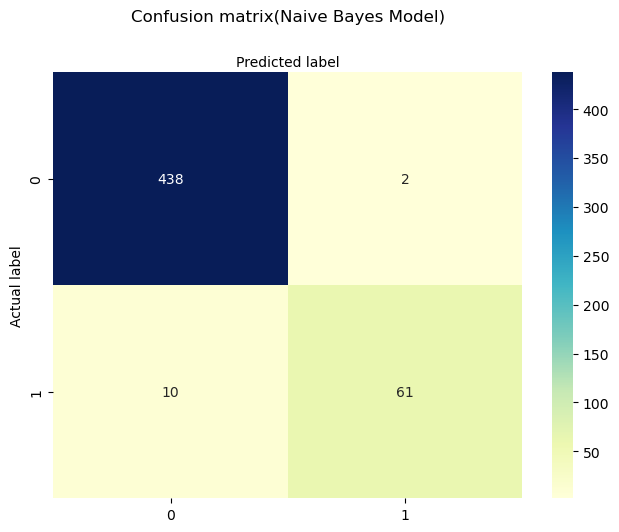

In [37]:
conf = confusion_matrix(y_pred,y_test)
class_names=['spam','ham']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix(Naive Bayes Model)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [38]:
print(classification_report(y_pred,y_test))
#Precision — What percent of your predictions were correct? (Precision = TP/(TP + FP))
#Recall — What percent of the positive cases did you catch? (Recall = TP/(TP+FN))
#F1 score — What percent of positive predictions were correct? (F1 Score = 2*(Recall * Precision) / (Recall + Precision))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       440
           1       0.97      0.86      0.91        71

    accuracy                           0.98       511
   macro avg       0.97      0.93      0.95       511
weighted avg       0.98      0.98      0.98       511



## Predictive System

In [52]:
input_mail = ["URGENT! Your Mobile number has been awarded with a Â£2000 prize GUARANTEED. Call 09058094455 from land line. Claim 3030. Valid 12hrs only"]

# convert text to feature vectors
input_data_features = count_vect.transform(input_mail)

# making prediction

prediction = NB.predict(input_data_features)
print(prediction)

if (prediction[0]==0):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Spam mail


In [39]:
import pickle

In [40]:
# Save the trained model and countVectorizer
pickle.dump(NB, open('model.pkl', 'wb'))
pickle.dump(count_vect, open('vectorizer.pkl', 'wb'))